# Linear Regression from Scratch



This Python notebook demonstrates how to generate a sine curve using NumPy and Matplotlib, and then fit a linear regression model to the curve using gradient descent algorithm implemented from scratch. The implementation includes the cost function, which computes the error between the predicted and actual values, and the gradient descent function, which updates the coefficients of the linear regression model iteratively to minimize the cost function. The notebook also visualizes the data, the linear regression model, and the cost function surface using Seaborn and Matplotlib. The purpose of this notebook is to provide a hands-on demonstration of the concepts of linear regression and gradient descent, and how they can be implemented in Python without relying on external libraries.

In [ ]:
# Import the necessary libraries and modules

import os                                                        # For interacting with the operating system
import pandas as pd                                              # For working with tabular data
import numpy as np                                               # For working with numerical data
import matplotlib.pyplot as plt                                  # For visualizing data
%matplotlib inline                                               # For displaying matplotlib plots inline
from sklearn.linear_model import LinearRegression                # For performing linear regression
from sklearn.metrics import r2_score,mean_squared_error          # For evaluating linear regression performance
import seaborn as sns                                            # For visualizing data with a high-level interface

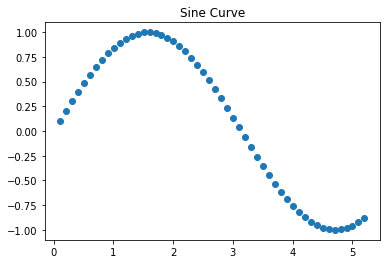

In [ ]:
# Create a numpy array 'X' with values ranging from pi/3 to 5pi/3 with increments of 0.1
X = np.arange(np.pi/3, (10*np.pi)/6, 0.1) 

# Calculate the corresponding sine values of each element in array X and assign to 'y'
y = np.sin(X)

# Plot the values of X and y as a scatter plot using matplotlib
plt.scatter(X, y)

# Set the title of the plot as 'Sine Curve'
plt.title('Sine Curve')

# Display the plot
plt.show()


In [ ]:
print(X)

[0.10471976 0.20471976 0.30471976 0.40471976 0.50471976 0.60471976
 0.70471976 0.80471976 0.90471976 1.00471976 1.10471976 1.20471976
 1.30471976 1.40471976 1.50471976 1.60471976 1.70471976 1.80471976
 1.90471976 2.00471976 2.10471976 2.20471976 2.30471976 2.40471976
 2.50471976 2.60471976 2.70471976 2.80471976 2.90471976 3.00471976
 3.10471976 3.20471976 3.30471976 3.40471976 3.50471976 3.60471976
 3.70471976 3.80471976 3.90471976 4.00471976 4.10471976 4.20471976
 4.30471976 4.40471976 4.50471976 4.60471976 4.70471976 4.80471976
 4.90471976 5.00471976 5.10471976 5.20471976]


In [ ]:
print(y)

[ 0.10452846  0.20329278  0.30002585  0.39376117  0.48356216  0.56853155
  0.64782037  0.72063637  0.78625202  0.8440117   0.89333829  0.93373894
  0.96480998  0.98624095  0.99781774  0.99942466  0.99104565  0.97276445
  0.94476371  0.9073232   0.86081701  0.80570983  0.74255226  0.67197535
  0.59468429  0.51145134  0.42310814  0.33053738  0.234664    0.13644593
  0.03686454 -0.06308518 -0.16240458 -0.26010129 -0.35519915 -0.44674798
 -0.53383305 -0.61558424 -0.69118471 -0.75987909 -0.82098102 -0.87387997
 -0.9180474  -0.95304201 -0.97851413 -0.99420927 -0.99997059 -0.99574054
 -0.98156138 -0.95757478 -0.92402041 -0.88123354]


In [ ]:
# Create a pandas DataFrame 'df' with the values of 'y' as the first argument and 'X' as the second argument
df = pd.DataFrame(y, X)

In [ ]:
df

,0
0.10472,0.104528
0.20472,0.203293
0.30472,0.300026
0.40472,0.393761
0.50472,0.483562
0.60472,0.568532
0.70472,0.647820
0.80472,0.720636
0.90472,0.786252
1.00472,0.844012


In [ ]:
# Reset the index of the DataFrame 'df'
df = df.reset_index()

In [ ]:
df

,index,0
0,0.10472,0.104528
1,0.20472,0.203293
2,0.30472,0.300026
3,0.40472,0.393761
4,0.50472,0.483562
5,0.60472,0.568532
6,0.70472,0.647820
7,0.80472,0.720636
8,0.90472,0.786252
9,1.00472,0.844012


In [ ]:
# Rename the columns of the DataFrame 'df' to 'x' and 'y'
df.rename(columns = {'index':'x', 0:'y'}, inplace = True)
df

,x,y
0,0.10472,0.104528
1,0.20472,0.203293
2,0.30472,0.300026
3,0.40472,0.393761
4,0.50472,0.483562
5,0.60472,0.568532
6,0.70472,0.647820
7,0.80472,0.720636
8,0.90472,0.786252
9,1.00472,0.844012


In [ ]:
# saving the dataframe
df.to_csv('file1.csv')

In [ ]:
# Define a function 'cost_function' that takes in inputs 'X', 'y', and 'theta'
def cost_function(X, y, theta):
    
  # Compute the number of training examples
  m = len(y)
  
  # Compute the predicted y values based on the input features and current parameter values
  y_pred = X.dot(theta)
  
  # Compute the difference between predicted y values and actual y values
  error = (y_pred - y) ** 2
  
  # Calculate the cost function value as the mean squared error divided by 2
  return 1/ (2*m) * np.sum(error)


In [ ]:
# Compute the number of training examples
m = df.x.size

# Append a column of ones to the feature matrix 'X'
X = np.append(np.ones((m, 1)), df.x.values.reshape(m, 1), axis=1)

# Reshape the target variable 'y' to be a 2D array
y = df.y.values.reshape(m, 1)

# Initialize the parameter vector 'theta' to zeros
theta = np.zeros((2, 1))

# Evaluate the cost function with the initial parameter values
cost_function(X, y, theta)


0.2739188476633819

In [ ]:
# Define a function 'gradient_descent' that takes in inputs 'X', 'y', 'theta', 'alpha', and 'iterations'
def gradient_descent(X, y, theta, alpha, iterations):
    
  # Compute the number of training examples
  m = len(y)
  
  # Initialize an empty list to store the cost function values at each iteration
  costs = []
  
  # Loop over the specified number of iterations
  for i in range(iterations):
    
    # Compute the predicted y values based on the input features and current parameter values
    y_pred = X.dot(theta)
    
    # Compute the difference between predicted y values and actual y values
    error = np.dot(X.transpose(), (y_pred - y))
    
    # Update the parameter values using the gradient descent update rule
    theta -= alpha * 1/m * error
    
    # Compute the cost function value with the updated parameter values and append it to the 'costs' list
    costs.append(cost_function(X, y, theta))
  
  # Return the final parameter values and the list of cost function values at each iteration
  return theta, costs


In [ ]:
# Use the 'gradient_descent' function to optimize the parameter values of the linear regression model
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)

# Print the learned parameter values in the form of a linear equation
print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))


h(x) = 1.18 + -0.41x1


In [ ]:
# Create arrays of theta_0 and theta_1 values to compute the cost function over a grid of parameter values
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

# Create a matrix to store the computed cost function values
cost_values = np.zeros((len(theta_0), len(theta_1)))

# Compute the cost function over a grid of parameter values
for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    # Create an array of parameter values for the current iteration
    t = np.array([theta_0[i], theta_1[j]])

    # Compute the cost function for the current parameter values and store the result in the cost_values matrix
    cost_values[i,j] = cost_function(X,y,t)


Text(0.5, 1.0, 'Values of cost function over iterations of gradient descent')

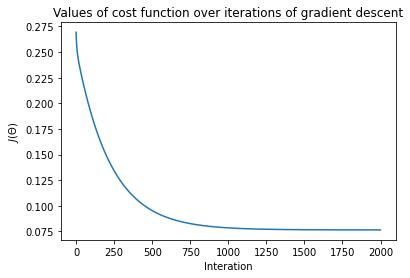

In [ ]:
plt.plot(costs)
plt.xlabel("Interation")
plt.ylabel("$J(\Theta)$")
plt.title("Values of cost function over iterations of gradient descent")

In [ ]:
theta.shape

(2, 1)

In [ ]:
theta

array([[ 1.17839013],
       [-0.41008695]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


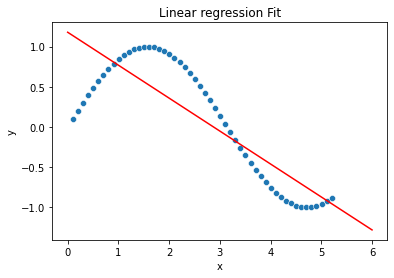

In [ ]:
# Remove any extra dimensions from the theta array using np.squeeze()
theta = np.squeeze(theta)

# Create a scatter plot of the data using seaborn
sns.scatterplot(x="x", y="y", data=df)

# Create a line plot of the linear regression fit using the computed theta values
x_value = [x for x in range(0, 7)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value, color='red')

# Add axis labels and a title to the plot
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit");
